<a href="https://colab.research.google.com/github/jhasankbharadwaj/iiith_course/blob/main/AIML_Module_4_Lab_1_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [70]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [71]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [72]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

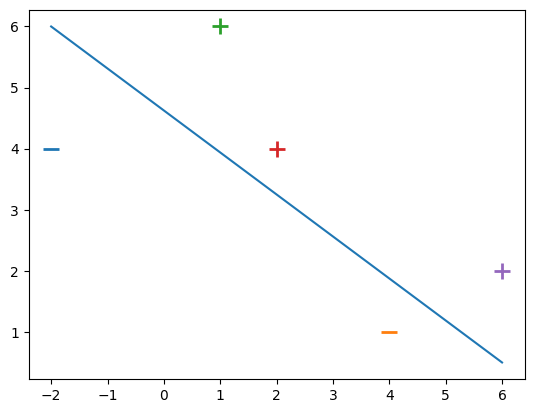

In [73]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

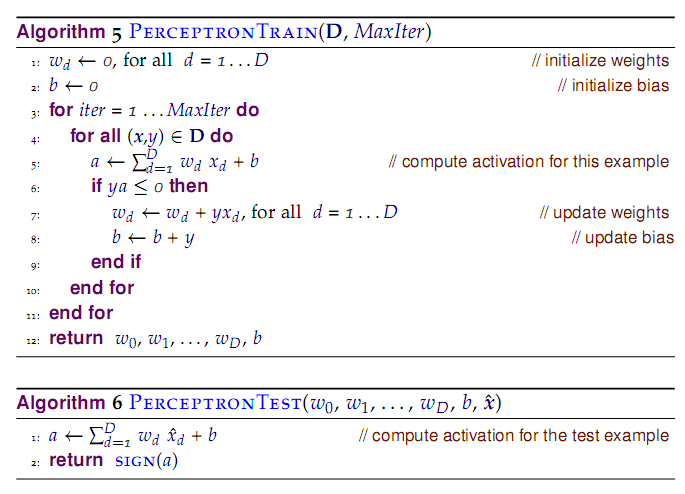

The algorithm is shown in the above image.

In [46]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [48]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

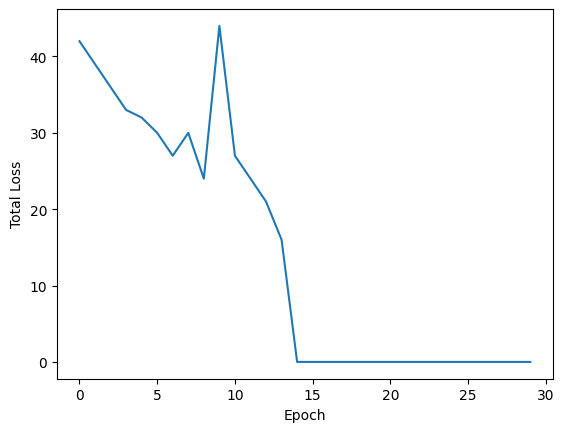

In [76]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

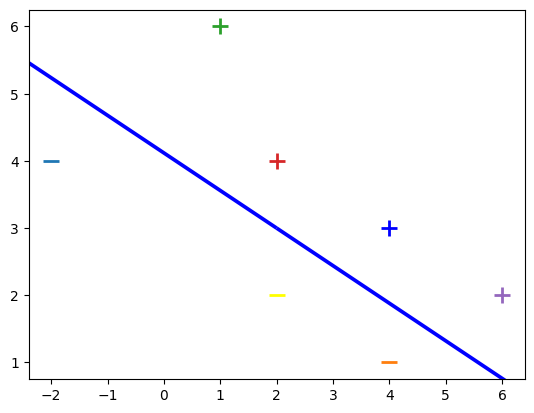

In [77]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [33]:
def perceptron_algo_plotn(X, Y):

    Y_mapped = np.where(Y == 1, -1, 1)# using where function modified the range of output

    w = np.zeros(len(X.columns))
    eta = 1
    n = 30
    errors = []

    for epoch in range(n):
        total_error = 0
        for i, x in X.iterrows():
            if (np.dot(x, w) * Y_mapped[i]) <= 0:
                total_error += (np.dot(x, w) * Y_mapped[i])
                w = w + eta * x * Y_mapped[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')
    plt.show()

    return w


In [34]:
from sklearn.datasets import fetch_openml

banknote = fetch_openml(name="banknote-authentication")

Xa, ya = banknote.data, banknote.target

print(banknote.DESCR)


Author: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe)  
Source: [UCI](https://archive.ics.uci.edu/ml/datasets/banknote+authentication) - 2012  
Please cite: [UCI](https://archive.ics.uci.edu/ml/citation_policy.html) 

Dataset about distinguishing genuine and forged banknotes. Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. A Wavelet Transform tool was used to extract features from these images.

### Attribute Information  

V1. variance of Wavelet Transformed image (continuous)  
V2. skewness of Wavelet Transformed image (continuous)  
V3. curtosis of Wavelet Transformed image (continuous)  
V4. entropy of image (continuous)  

Class (target). Presumably 1 for genuine 

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [39]:
Xa.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
 2   V3      1372 non-null   float64
 3   V4      1372 non-null   float64
dtypes: float64(4)
memory usage: 43.0 KB


In [40]:
first_row = Xa.iloc[0]
print(ya.sample(5))
print(Xa.sample(5))


494     1
1074    2
680     1
842     2
974     2
Name: Class, dtype: category
Categories (2, object): ['1', '2']
           V1        V2       V3       V4
37    3.62890   0.81322   1.6277  0.77627
38    4.56790   3.19290  -2.1055  0.29653
948  -3.49170 -12.17360  14.3689 -0.61639
1154 -0.36025  -4.44900   2.1067  0.94308
355  -0.21661   8.03290   1.8848 -3.88530


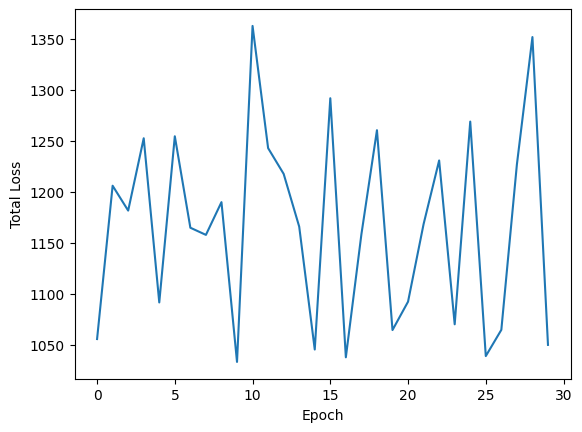

In [38]:
wnw = perceptron_algo_plotn(Xa, ya)

In [59]:
def perceptron_algo_plotnew(X, Y):
    Y_mapped = np.where(Y == 1, -1, 1)  # using where function modified the range of output

    w = np.zeros(len(X.columns))
    eta_values = [0.1, 0.5, 1, 2, 2.5, 5, 10]
    n = 30

    for eta1 in eta_values:
        print("Learning rate:", eta1)

        errors = []  # Initialize errors list for each learning rate

        for epoch in range(n):
            total_error = 0

            for i, x in X.iterrows():
                if (np.dot(x, w) * Y_mapped[i]) <= 0:
                    total_error += (np.dot(x, w) * Y_mapped[i])
                    w = w + eta1 * x * Y_mapped[i]

            errors.append(total_error * -1)

        plt.plot(errors)
        plt.xlabel('Epoch')
        plt.ylabel('Total Loss')
        plt.title(f'Learning Rate: {eta1}')
        plt.show()

    return w


Learning rate: 0.1


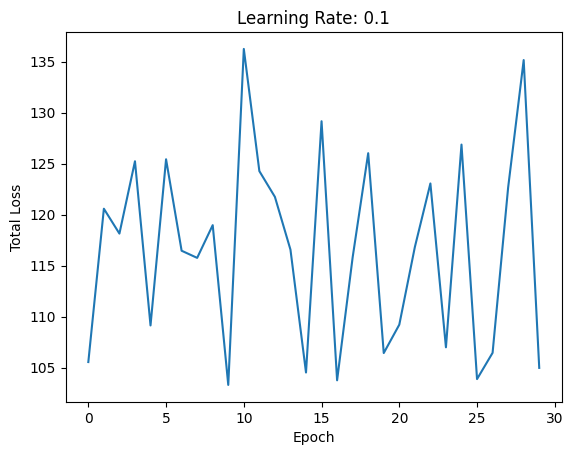

Learning rate: 0.5


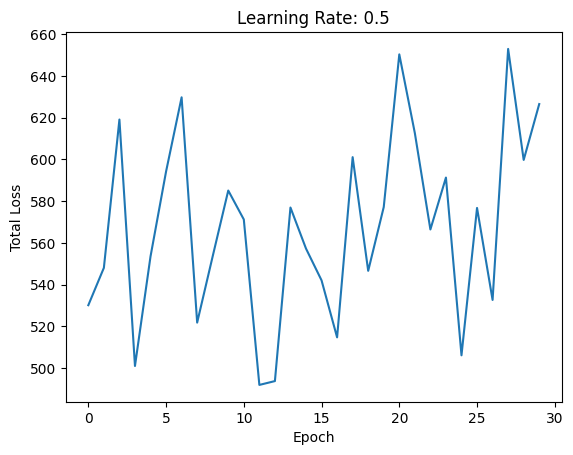

Learning rate: 1


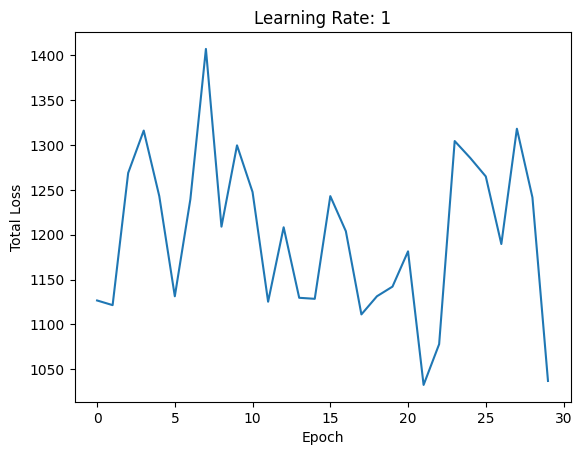

Learning rate: 2


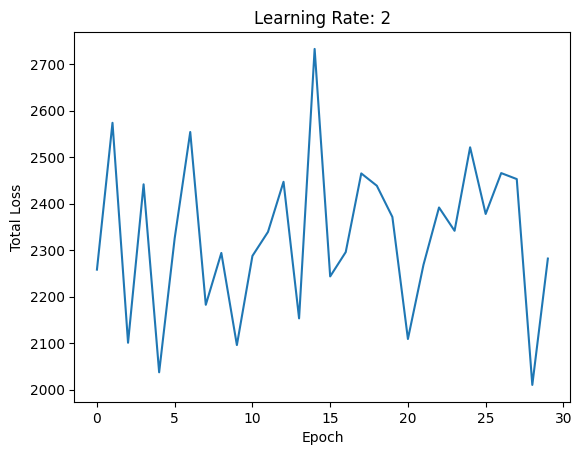

Learning rate: 2.5


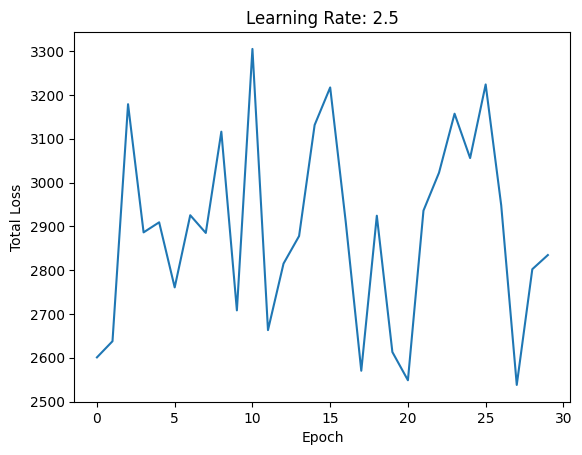

Learning rate: 5


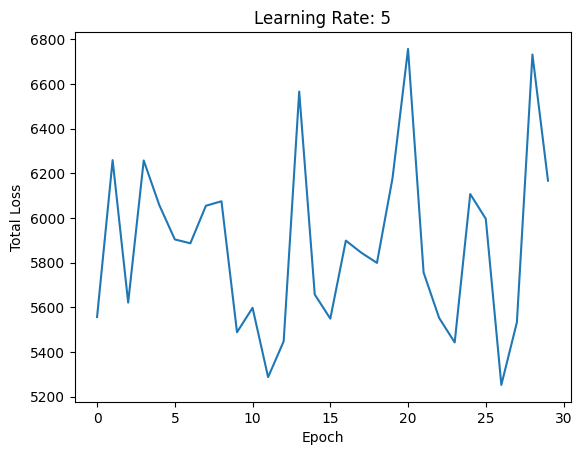

Learning rate: 10


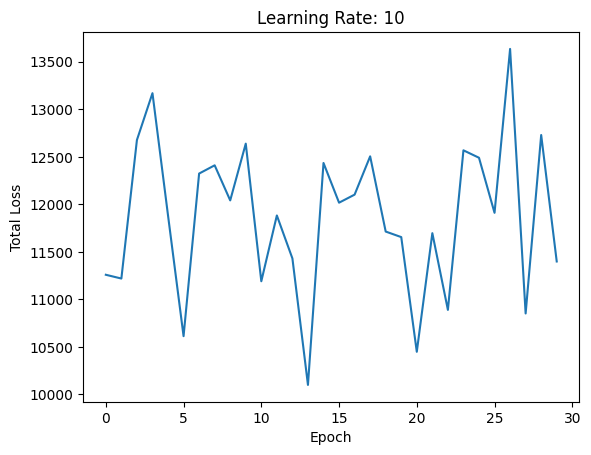

V1   -125.158339
V2    -90.481612
V3    -50.016863
V4   -108.018364
dtype: float64

In [60]:
perceptron_algo_plotnew(Xa, ya)

# lower learning rate prioritizes precision at the expense of speed, while a higher learning rate prioritizes speed but risks overshooting and missing the optimal solution. Balancing these trade-offs is a critical aspect of selecting an appropriate learning rate for effective and efficient model training.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [41]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


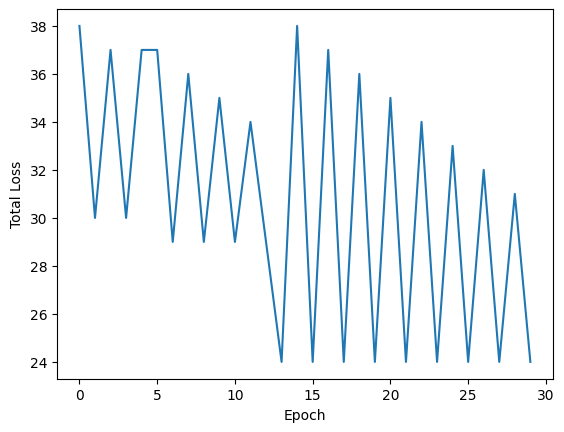

In [49]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

In [69]:
#@ 3 -
X = np.array([
    [-1, 5, -1],
    [5, 1, -1],
    [1, 6, -1],
    [1, 4, -1],
    [6, 1, -1],
])
y = np.array([-1, -1, 1, -1, -1])

[-3.  0. 14.]


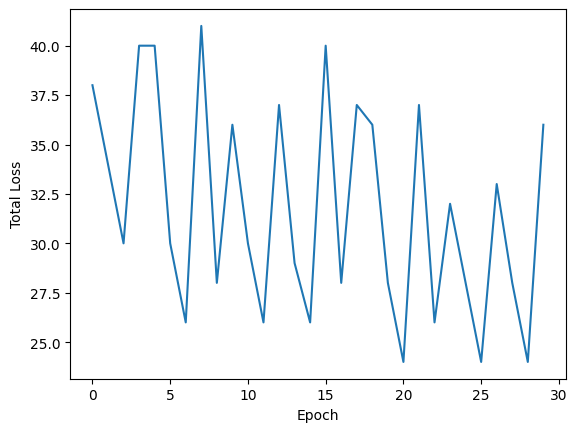

In [70]:
print(perceptron_algo_plot(X, y))